## Exercise 1

In [1]:
from scipy.stats import beta,norm
import numpy as np
import matplotlib.pyplot as plt
class kernel_density_estimator:
    def __init__(self,data,h=None):
        self.data = data
        def bandwidth(data,n):
            σ = np.std(data,ddof=1)
            return (4*σ**5/(3*n))**(1/5)
        if h == None:
            self.h = bandwidth(self.data,np.size(self.data))
        else:
            self.h = h
            
    def estimate_density(self,x):
        n = np.size(self.data)
        return np.sum(norm.pdf((x-self.data)/self.h))/(self.h*n)

    def plot_density(self,α,β,n=100):
        xmax = 0
        xmin = 1
        xgrid = np.linspace(xmin,xmax,200)

        kde = []
        real_density = beta.pdf(xgrid,a=α,b=β)
        for x in xgrid:
            kde.append(self.estimate_density(x))
        fig,ax = plt.subplots()
        ax.plot(xgrid,kde,'b-',label='kde')
        ax.plot(xgrid,real_density,'r--',label='real density')
        ax.legend(loc='upper right')
        plt.show()

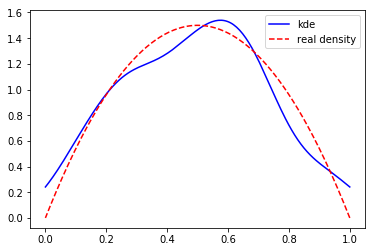

In [2]:
α,β = 2,2
data = beta.rvs(a=α,b=β,size=100)
k = kernel_density_estimator(data)
k.plot_density(α,β)

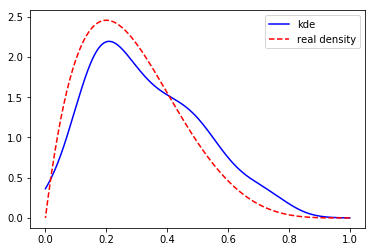

In [3]:
α,β = 2,5
data = beta.rvs(a=α,b=β,size=100)
k = kernel_density_estimator(data)
k.plot_density(α,β)

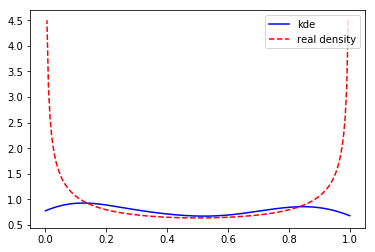

In [4]:
α,β = 0.5,0.5
data = beta.rvs(a=α,b=β,size=100)
k = kernel_density_estimator(data)
k.plot_density(α,β)

### conclusion
In the first two cases, kernel density estimator greatly fits real density.   
However, when we put $\alpha$ and $\beta$ to 0.5, this estimator seems to perform poorly.

## Exercise 2

In [5]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plot $\psi_t$ and $\psi_{t+1}$ using the true distributions:

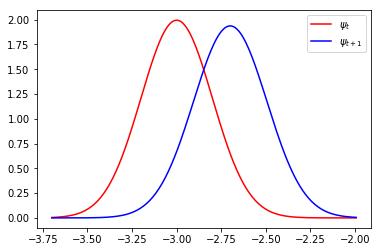

In [6]:
ρ = 0.9
b  = 0.0
σ = 0.1
μ = -3.0
s  = 0.2

def plot_1(ρ,b,σ,μ,s):
    mu_1 = μ
    sigma_1 = s
    mu_2 = ρ*μ+b
    sigma_2 = np.sqrt(ρ**2*s**2+σ**2)

    xmin = min(mu_1-sigma_1,mu_2-sigma_2)-0.5
    xmax = max(mu_1+sigma_1,mu_2+sigma_2)+0.5
    xgrid = np.linspace(xmin,xmax,200)
    psi_t = norm.pdf(xgrid,loc=mu_1,scale=sigma_1)
    psi_tplus1 = norm.pdf(xgrid,loc=mu_2,scale=sigma_2)
    fig,ax = plt.subplots()
    ax.plot(xgrid,psi_t,'r-',label='$\psi_t$')
    ax.plot(xgrid,psi_tplus1,'b-',label='$\psi_{t+1}$')
    ax.legend(loc='best')
    plt.show()
    
plot_1(ρ,b,σ,μ,s)

In [7]:
def plot_2(ρ,b,σ,μ,s,n):
    mu_1 = μ
    sigma_1 = s
    mu_2 = ρ*μ+b
    sigma_2 = np.sqrt(ρ**2*s**2+σ**2)
    xmin = min(mu_1-sigma_1,mu_2-sigma_2)-0.5
    xmax = max(mu_1+sigma_1,mu_2+sigma_2)+0.5
    xgrid = np.linspace(xmin,xmax,200)
    
    psi_tplus1 = norm.pdf(xgrid,loc=mu_2,scale=sigma_2)
    
    xt = norm.rvs(loc=μ,scale=s,size=n)
    xtplus1 = []
    for x in xt:
        ξ = norm.rvs(loc=0,scale=1,size=1)
        xtplus1.append(ρ*x+b+σ*ξ)
    kde = []
    k = kernel_density_estimator(xtplus1)
    for x in xgrid:
        kde.append(k.estimate_density(x))
    fig,ax = plt.subplots()
    ax.plot(xgrid,kde,'b-',label='kde')
    ax.plot(xgrid,psi_tplus1,'r--',label='real density')
    ax.legend(loc='upper right')
    plt.show()

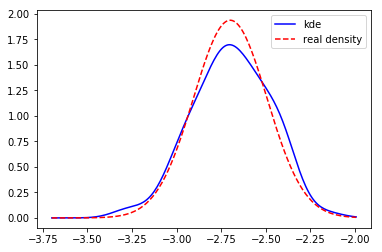

In [8]:
plot_2(ρ,b,σ,μ,s,100)

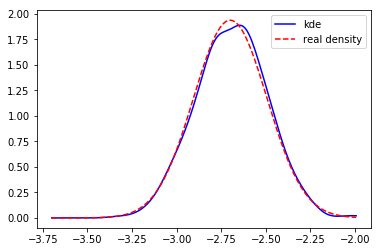

In [9]:
plot_2(ρ,b,σ,μ,s,500)

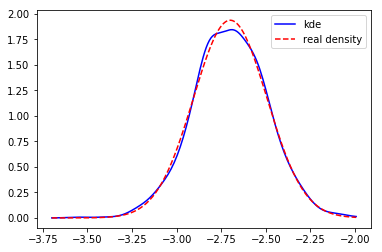

In [10]:
plot_2(ρ,b,σ,μ,s,1000)

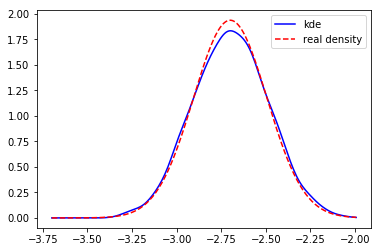

In [11]:
plot_2(ρ,b,σ,μ,s,5000)

### Conclusion
When n increases, the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.